# Processing Notebook

This notebook lets you process your data and visualize it. 

Arguments:
- **input_file_path**: path to your input anndata
- **output_file_path**: path to save output anndata
- **min_genes**: min genes expressed for a cell to pass filtering
- **min_counts**: min counts required for a cell to pass filtering
- **cluster_resolution**: cluster resolution for louvain
- **batch_correction**: `None` or `bbknn`. If `bbknn` requires the `batch_key` arg
- **batch_key**: key in input anndata to perform batch correction on

In [9]:
input_file_path = 'data/adata_small_test.h5ad'
output_file_path = 'data/adata_small_output.h5ad'

min_genes=200
min_counts=2500
cluster_resolution=5
batch_correction = None
batch_key = 'batch'

reading data in
pre-processing
normalization & scaling


/opt/conda/envs/tabula_sapiens/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/opt/conda/envs/tabula_sapiens/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/opt/conda/envs/tabula_sapiens/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/opt/conda/envs/tabula_sapiens/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:297: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if isinstance(data, AnnData) and data.isview:
/opt/conda/envs/tabula_sapien

pca


/opt/conda/envs/tabula_sapiens/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


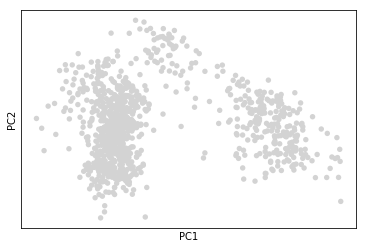

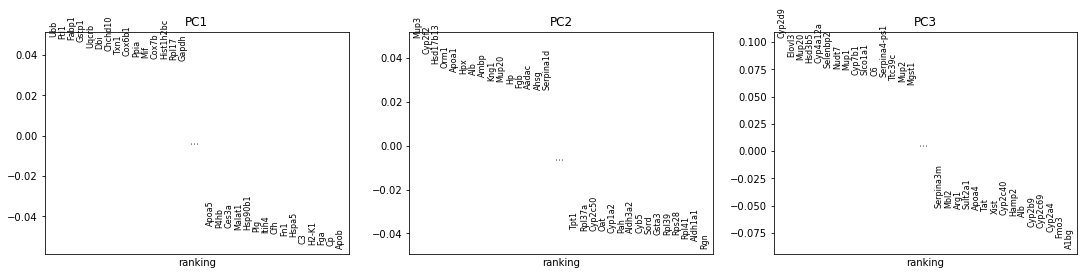

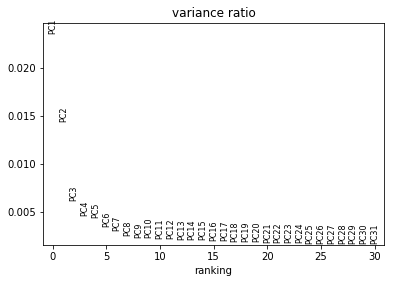

/opt/conda/envs/tabula_sapiens/lib/python3.6/site-packages/scanpy/neighbors/__init__.py:104: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:  # we shouldn't need this here...
/opt/conda/envs/tabula_sapiens/lib/python3.6/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/opt/conda/envs/tabula_sapiens/lib/python3.6/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
/opt/conda/envs/tabula_sapiens/lib/python3.6/site-packages/scanpy/tools/_umap.py:144: FutureWarning: This location 

umap computing
clustering


/opt/conda/envs/tabula_sapiens/lib/python3.6/site-packages/scanpy/tools/_louvain.py:108: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adjacency = adata.uns['neighbors']['connectivities']
/opt/conda/envs/tabula_sapiens/lib/python3.6/site-packages/scanpy/tools/_leiden.py:112: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adjacency = adata.uns['neighbors']['connectivities']


save h5ad and launch cellxgene


/opt/conda/envs/tabula_sapiens/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


In [10]:
import scanpy as sc
print('reading data in')
adata = sc.read_h5ad(input_file_path)

print('pre-processing')
sc.pp.filter_cells(adata, min_genes=min_genes)
sc.pp.filter_cells(adata, min_counts=min_counts)

print('normalization & scaling')
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
adata_nonans = sc.pp.filter_genes_dispersion(
    adata, subset=False, min_disp=.5, max_disp=None,
    min_mean=.0125, max_mean=10, n_bins=20, n_top_genes=None,
    log=True, copy=True)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10, zero_center=False)

adata.raw = adata

print('pca')
sc.tl.pca(adata)
# # optional
sc.pl.pca_overview(adata)

if batch_correction == 'bbknn':
    sc.external.pp.bbknn(adata,metric = 'angular',
                          batch_key=batch_key,
                          approx=True,
                          n_pcs=n_pcs, trim=None, n_trees=10,
                          use_faiss=True, set_op_mix_ratio=1.0, local_connectivity=1)

else:
    sc.pp.neighbors(adata, n_neighbors=25, n_pcs=20)

print('umap computing')
sc.tl.umap(adata, n_components=2)

print('clustering')
sc.tl.louvain(adata, resolution=cluster_resolution)
sc.tl.leiden(adata, resolution=cluster_resolution)

print('save h5ad and launch cellxgene')
adata.write(output_file_path)
